In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import defaultdict

from glob import glob
from lib import Consensus
from lib import Simulation

from lib import ACTIVE_CIRCUITS_PER_SECOND
from lib import ACTIVE_CIRCUITS_PER_SECOND_STD

In [2]:
ACTIVE_CIRCUITS_PER_SECOND

96876

In [3]:
guard_bandwidth = []
middle_bandwidth = []
exit_bandwidth = []

for filename in glob('./../archive/in/consensuses-2021-11/**/*-02-00-00-consensus'):    
    consensus = Consensus.read(filename)
    simulation = Simulation.from_consensus(consensus, N=ACTIVE_CIRCUITS_PER_SECOND).simulate()

    guards, middles, exits = zip(*simulation.circuits)
    
    guards = list(guards)
    middles = list(middles)
    exits = list(exits)
    
    guard_bandwidth.extend(consensus.df.loc[guards]['Bandwidth'])
    middle_bandwidth.extend(consensus.df.loc[middles]['Bandwidth'])
    exit_bandwidth.extend(consensus.df.loc[exits]['Bandwidth']) 

In [4]:
np.median(guard_bandwidth), np.median(middle_bandwidth), np.median(exit_bandwidth)

(28700.0, 26000.0, 28000.0)

In [5]:
np.mean(guard_bandwidth), np.mean(middle_bandwidth), np.mean(exit_bandwidth)

(35385.9942744677, 33468.763776718006, 34937.296974138764)

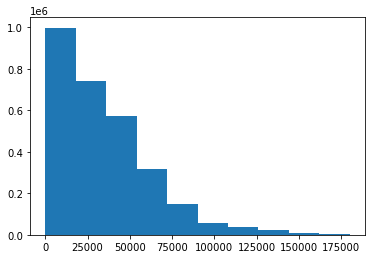

In [6]:
plt.hist(guard_bandwidth)
plt.show()

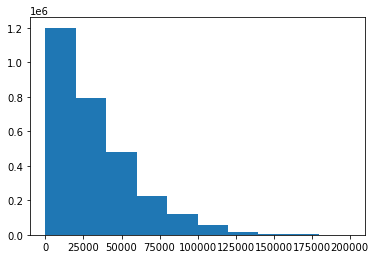

In [7]:
plt.hist(middle_bandwidth)
plt.show()

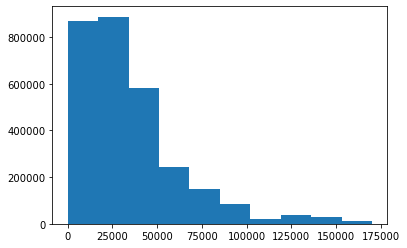

In [8]:
plt.hist(exit_bandwidth)
plt.show()